# 2- CALIDAD DE DATOS Y EDA 

## IMPORTACIÓN DE PAQUETES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## IMPORTAR LOS DATOS

In [3]:
df = pd.read_csv('../../02_Datos/03_Trabajo/trabajo.csv', index_col=0)

## VISIÓN GENERAL

In [4]:
df.head()

,precio_compra,precio_mto,n_puertas,n_personas,t_maletero,nivel_seguridad,aceptabilidad
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   precio_compra    1210 non-null   object
 1   precio_mto       1210 non-null   object
 2   n_puertas        1210 non-null   object
 3   n_personas       1210 non-null   object
 4   t_maletero       1210 non-null   object
 5   nivel_seguridad  1210 non-null   object
 6   aceptabilidad    1210 non-null   object
dtypes: object(7)
memory usage: 75.6+ KB


### CORRECCIÓN DE NOMBRE DE VARIABLES

No aplica. La corrección de los nombre se realizó en el Sep-Up.

### TIPOS DE DATOS

In [6]:
df.dtypes

precio_compra      object
precio_mto         object
n_puertas          object
n_personas         object
t_maletero         object
nivel_seguridad    object
aceptabilidad      object
dtype: object

- **Conclusión** 

Aunque n_puertas y n_personas la mayor parte son numéricos hay una valore "more" que es texto, por ese motivo el tipo de datos en todas las variables es object.

No afecta debido a que se tendrá que realizar a todos las variables un Ordinal Encoder en la fase de transformación de variables. 

## BALANCEO DE LA TARGET

In [7]:
df.aceptabilidad.value_counts(normalize = True)*100

unacc    70.909091
acc      21.404959
good      3.966942
vgood     3.719008
Name: aceptabilidad, dtype: float64

### VALORES ÚNICOS

In [8]:
df.nunique()

precio_compra      4
precio_mto         4
n_puertas          4
n_personas         3
t_maletero         3
nivel_seguridad    3
aceptabilidad      4
dtype: int64

- **Conclusión:** No se aprecian valores únicos.

### VALORES DUPLICADOS

In [9]:
df.duplicated().sum()

0

- **Conclusión:** No se aprecian valores duplicados.

### VALORES NULOS

In [10]:
df.isna().sum()

precio_compra      0
precio_mto         0
n_puertas          0
n_personas         0
t_maletero         0
nivel_seguridad    0
aceptabilidad      0
dtype: int64

- **Conclusión:** No se aprecian valores nulos.

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

No hay valores numéricos por lo que se trabajará con el mismo dataset.

### GESTIÓN DE CATEGÓRICAS

Estadísticos y gráficos de las variables categóricas

In [11]:
def estadisticos_cont(df_cat):
    #Calculamos describe
    estadisticos = df_cat.describe().T
    return(estadisticos)

estadisticos_cont(df)

,count,unique,top,freq
precio_compra,1210,4,vhigh,309
precio_mto,1210,4,med,313
n_puertas,1210,4,3,320
n_personas,1210,3,2,417
t_maletero,1210,3,small,410
nivel_seguridad,1210,3,low,408
aceptabilidad,1210,4,unacc,858


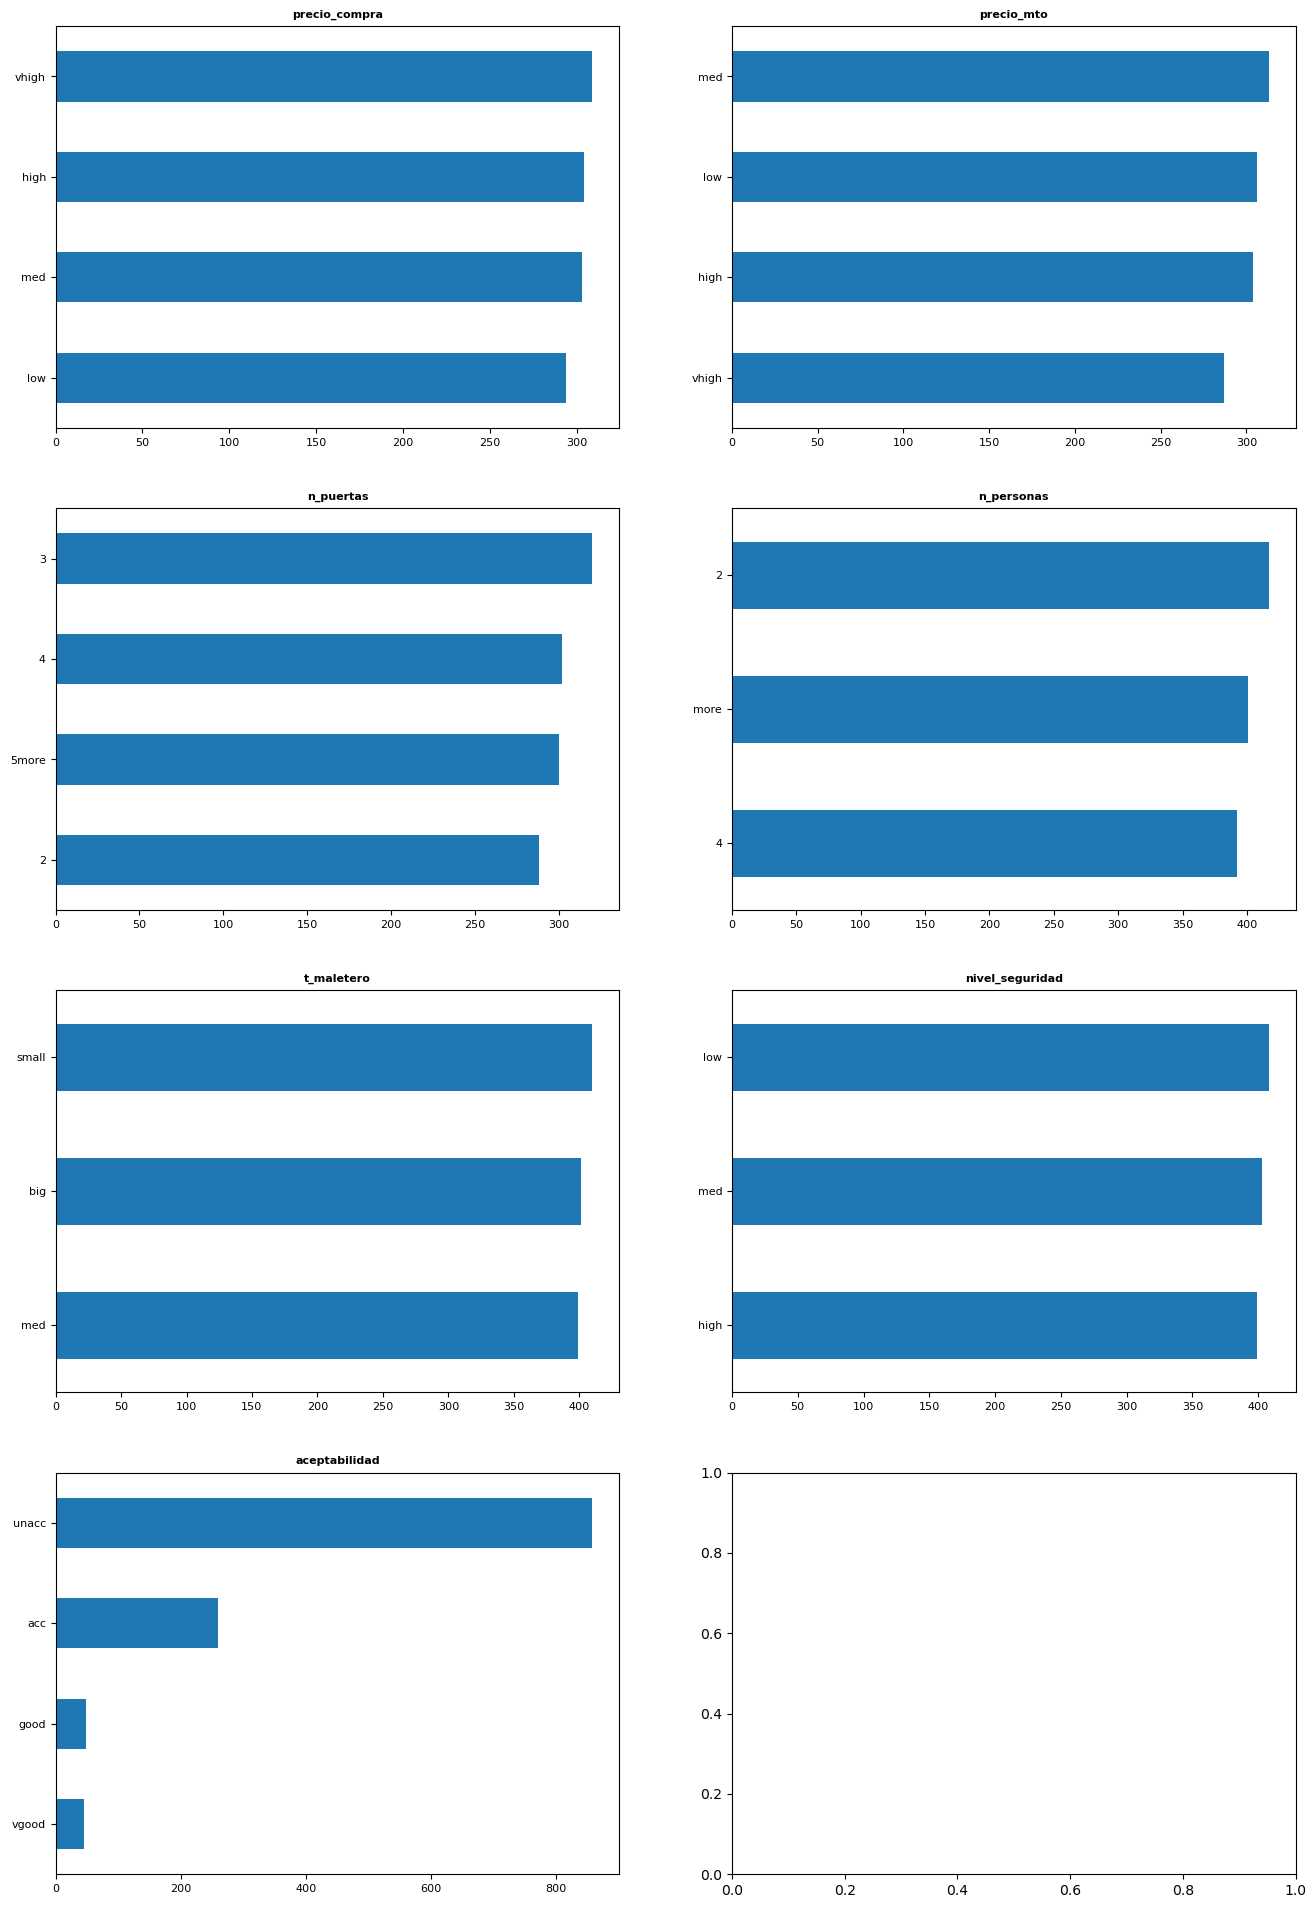

In [12]:
def graficos_eda_categoricos(df_cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(df_cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts(ascending = True).plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 8, fontweight = "bold")
        ax[cada].tick_params(labelsize = 8)
                
graficos_eda_categoricos(df)

### GESTIÓN DE ATÍPICOS

No se detecta ninguna categórica con poco frecuencia (salvo la target)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [16]:
#Nombre archivo y ruta
nombre_archivo = 'tablon_analitico.csv'
ruta = '../../02_Datos/03_Trabajo/'
ruta_completa = ruta + nombre_archivo

df.to_csv(ruta_completa)